<a href="https://colab.research.google.com/github/parthrjpt/EAS555_Projects/blob/main/ProblemSet3_555.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




### Written in Python 3


## Constructing the model

In [ ]:
!pip install pgmpy
!pip install pybbn

     |████████████████████████████████| 327kB 4.9MB/s 
  Created wheel for pybbn: filename=pybbn-3.2.1-cp37-none-any.whl size=39725 sha256=7183a3ca4efc054c02bedc92e20e6f2bececff53220bf281efce9df717556d28
  Stored in directory: /root/.cache/pip/wheels/ff/c3/66/eb77d2de44377277f3e2db6f0e498896c0d6cd7225cffffd18
Successfully built pybbn


In [ ]:
# Importing the general dependencies and the Probabilistic Graphical Model libraries
import pgmpy
import numpy as np
import warnings
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the Probabilistic Graphical Model with the random and dependent variables
graph_model = BayesianModel([('Asia', 'Tub'),('Bronc', 'Dysp'),('Either', 'Xray'),('Either', 'Dysp'),
                                    ('Lung', 'Either'),('Smoke', 'Lung'),('Smoke', 'Bronc'),('Tub', 'Either')])

# Defining the parameters and assiciating them with the Model
asia = TabularCPD(variable='Asia', variable_card = 2, values = [[0.01], [0.99]])
bronc = TabularCPD(variable='Bronc', variable_card=2, values=[[0.6, 0.3], 
                                                              [0.4, 0.7]], evidence = ['Smoke'], evidence_card = [2])
lung = TabularCPD(variable='Lung', variable_card=2, values=[[0.1, 0.01], 
                                                              [0.9, 0.99]], evidence = ['Smoke'], evidence_card = [2])
either = TabularCPD(variable='Either', variable_card=2, values=[[1, 1, 1, 0], 
                                                              [0, 0, 0, 1]], evidence = ['Tub', 'Lung'], evidence_card = [2, 2])
smoke = TabularCPD(variable='Smoke', variable_card = 2, values = [[0.5], [0.5]])
tub = TabularCPD(variable='Tub', variable_card=2, values=[[0.05, 0.01], 
                                                              [0.95, 0.99]], evidence = ['Asia'], evidence_card = [2])
xray = TabularCPD(variable='Xray', variable_card=2, values=[[0.98, 0.05], 
                                                              [0.02, 0.95]], evidence = ['Either'], evidence_card = [2])
dysp = TabularCPD(variable='Dysp', variable_card=2, values=[[0.9, 0.7, 0.8, 0.1], 
                                                              [0.1, 0.3, 0.2, 0.9]], evidence = ['Bronc', 'Either'], evidence_card = [2, 2])
graph_model.add_cpds(asia, bronc, dysp, either, lung, smoke, tub, xray)


print('Asia, Bronc: ', graph_model.is_active_trail('Asia', 'Either'))
print('Xray, Smoke: ', graph_model.is_active_trail('Xray', 'Smoke'))

Asia, Bronc:  True
Xray, Smoke:  True


('Asia', 'Tub')
('Tub', 'Either')
('Bronc', 'Dysp')
('Either', 'Xray')
('Either', 'Dysp')
('Lung', 'Either')
('Smoke', 'Lung')
('Smoke', 'Bronc')


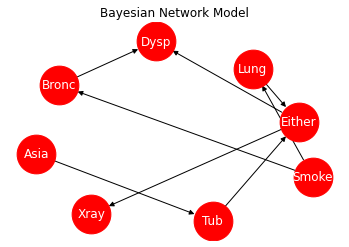

In [ ]:
# Importing dependencies for plotting graph
import networkx as nx
import matplotlib.pyplot as plt

# Printing the edges in the graph
for edge in graph_model.edges():
    print(edge)

# Drawing the Model
plt.title('Bayesian Network Model')
nx.draw(graph_model, with_labels=True, node_color='r', node_size=1500, font_size=12, font_color='white')
plt.show()

('Asia', 'Tub')
('Tub', 'Either')
('Tub', 'Lung')
('Either', 'Bronc')
('Either', 'Dysp')
('Either', 'Xray')
('Either', 'Lung')
('Lung', 'Smoke')
('Bronc', 'Dysp')
('Bronc', 'Smoke')


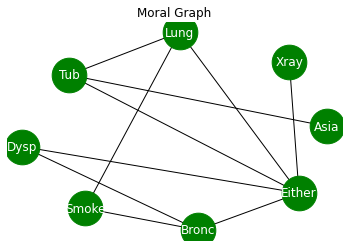

In [ ]:
# Constructing the Moralized Bayesian Network Model
moral_graph = graph_model.to_markov_model()

# Printing the edges in the graph
for edge in moral_graph.edges():
    print(edge)
    
# Drawing the Model
plt.title('Moral Graph')
nx.draw(moral_graph, with_labels=True, node_color='g', node_size=1200, font_size=12, font_color='white')
plt.savefig('moral_graph.png')
plt.show()

('Asia', 'Tub')
('Asia', 'Dysp')
('Asia', 'Smoke')
('Asia', 'Bronc')
('Asia', 'Xray')
('Asia', 'Lung')
('Tub', 'Either')
('Tub', 'Lung')
('Tub', 'Xray')
('Tub', 'Bronc')
('Tub', 'Dysp')
('Either', 'Bronc')
('Either', 'Dysp')
('Either', 'Xray')
('Either', 'Lung')
('Lung', 'Smoke')
('Lung', 'Bronc')
('Lung', 'Dysp')
('Lung', 'Xray')
('Bronc', 'Dysp')
('Bronc', 'Smoke')
('Bronc', 'Xray')
('Dysp', 'Xray')
('Dysp', 'Smoke')
('Xray', 'Smoke')


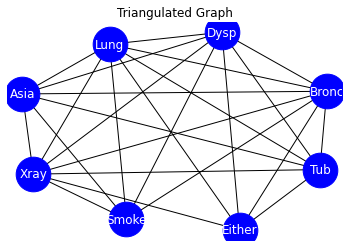

In [ ]:
#Triangulate Graph
triangulated_graph = moral_graph.triangulate()

# Printing the edges in the graph
for edge in triangulated_graph.edges():
    print(edge)

# Drawing the Model
plt.figure()
plt.title('Triangulated Graph')
nx.draw(triangulated_graph, with_labels=True, node_color='b', node_size=1200, font_size=12, font_color='white')
plt.show()

(('Lung', 'Xray', 'Dysp', 'Bronc', 'Asia', 'Smoke'), ('Lung', 'Xray', 'Dysp', 'Bronc', 'Asia', 'Tub'))
(('Lung', 'Xray', 'Dysp', 'Bronc', 'Asia', 'Tub'), ('Lung', 'Xray', 'Dysp', 'Bronc', 'Either', 'Tub'))


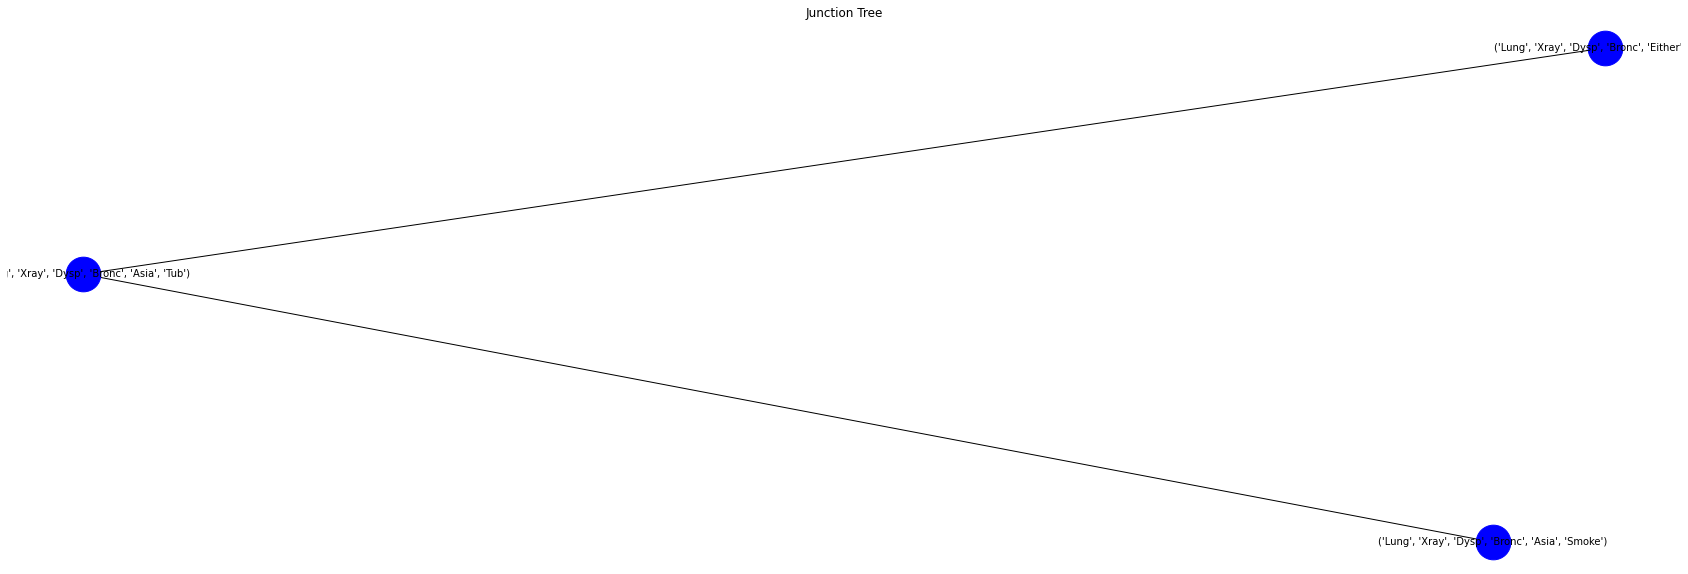

In [ ]:
junction_tree = triangulated_graph.to_junction_tree()

# Printing the edges in the graph
for edge in junction_tree.edges():
    print(edge)

# Drawing the Model
plt.figure(figsize=[30,10])
plt.title('Junction Tree')
nx.draw(junction_tree, with_labels=True, node_color='b', node_size=1200, font_size=10, font_color='black')
plt.show()


## Task 2

In [ ]:
# Importing the dependencies
import IPython
from IPython.display import Image
from pgmpy.inference import VariableElimination

In [ ]:
# Performing the Variable Elimination and querying the graphical model
graph_inference = VariableElimination(graph_model)
query = graph_inference.query(variables=['Tub', 'Lung','Bronc'],evidence={'Asia': 0, 'Xray': 0},joint=True)

# Printing the Joint Probability
print(str(query))

Eliminating: Smoke: 100%|██████████| 3/3 [00:00<00:00, 97.17it/s]

+--------+---------+----------+-----------------------+
| Tub    | Lung    | Bronc    |   phi(Tub,Lung,Bronc) |
+========+=========+==========+=======================+
| Tub(0) | Lung(0) | Bronc(0) |                0.0106 |
+--------+---------+----------+-----------------------+
| Tub(0) | Lung(0) | Bronc(1) |                0.0079 |
+--------+---------+----------+-----------------------+
| Tub(0) | Lung(1) | Bronc(0) |                0.1413 |
+--------+---------+----------+-----------------------+
| Tub(0) | Lung(1) | Bronc(1) |                0.1778 |
+--------+---------+----------+-----------------------+
| Tub(1) | Lung(0) | Bronc(0) |                0.2021 |
+--------+---------+----------+-----------------------+
| Tub(1) | Lung(0) | Bronc(1) |                0.1508 |
+--------+---------+----------+-----------------------+
| Tub(1) | Lung(1) | Bronc(0) |                0.1370 |
+--------+---------+----------+-----------------------+
| Tub(1) | Lung(1) | Bronc(1) |                0

In [ ]:
# from pgmpy.inference import BeliefPropagation
# bp = BeliefPropagation(junction_tree)
# bp.calibrate()

In [ ]:
#bp.map_query(variables=['Tub', 'Lung','Bronc'],
#                             evidence={'Asia': 0, 'Xray': 0})

## Due to version compatibility issues, A different notebook is submitted for remaining of part 2



### References:

*  Kiran R. Karkera. 2014. Building Probabilistic Graphical Models with Python. Packt Publishing.
*  pgmpy documentation (https://pgmpy.org/)